In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [7]:
data = pd.read_csv("D:\\data science projects\\Car Dekho car pred\\Cardekho-Car-price-predition\\data\\cardekho_dataset.csv")

In [8]:
data.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [10]:
data.tail()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
15406,19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000
15410,19543,Honda City,Honda,City,2,13000,Dealer,Petrol,Automatic,18.00,1497,117.60,5,1200000


In [11]:
# shape of data
data.shape

(15411, 14)

In [12]:
# summary stats of the data
data.describe()

,Unnamed: 0,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,9811.857699,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,5643.418542,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4906.500000,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,9872.000000,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,14668.500000,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,19543.000000,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [13]:
# check info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


### Exploring data

In [18]:
num_features = [feature for feature in data.columns if data[feature].dtype!="O"]
cat_features = [feature for feature in data.columns if data[feature].dtype=="O"]

In [20]:
print(num_features)
print("**********************")
print(cat_features)

['Unnamed: 0', 'vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']
**********************
['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']


In [21]:
print("We have {} numerical features : {} ".format(len(num_features), num_features))
print("we hav {} cat features : {} ".format(len(cat_features), cat_features))

We have 8 numerical features : ['Unnamed: 0', 'vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price'] 
we hav 6 cat features : ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type'] 


In [25]:
# proporation of count data on cat features
for i in cat_features:
    print(data[i].value_counts(normalize=alize=True)*100)

Hyundai i20           5.878918
Maruti Swift Dzire    5.775096
Maruti Swift          5.067809
Maruti Alto           5.048342
Honda City            4.912076
                        ...   
Mercedes-AMG C        0.006489
Tata Altroz           0.006489
Ferrari GTC4Lusso     0.006489
Hyundai Aura          0.006489
Force Gurkha          0.006489
Name: car_name, Length: 121, dtype: float64
Maruti           32.392447
Hyundai          19.349815
Honda             9.635974
Mahindra          6.560249
Toyota            5.145675
Ford              5.126209
Volkswagen        4.023100
Renault           3.478035
BMW               2.848615
Tata              2.790215
Mercedes-Benz     2.186750
Skoda             2.167283
Audi              1.245863
Datsun            1.103108
Jaguar            0.382843
Land Rover        0.330932
Jeep              0.266044
Kia               0.207644
Porsche           0.136266
Volvo             0.129777
MG                0.123289
Mini              0.110311
Nissan            0.0

## Univariate Analysis

### Numerical Features

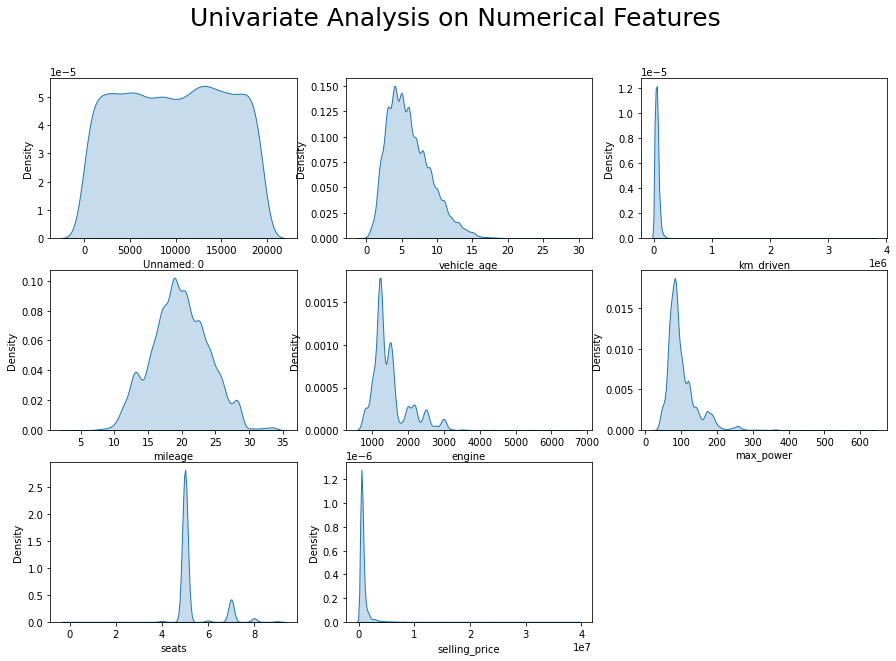

In [34]:
plt.figure(figsize=(15 ,10))
plt.suptitle("Univariate Analysis on Numerical Features", fontsize=25)

for i in range(0 , len(num_features)):
    plt.subplot(3 , 3, i+1)
    sns.kdeplot(x = data[num_features[i]] , shade=True)
    plt.xlabel(num_features[i])

### Observation:

- km_driven , engine , max_power and selling price have the right skewed curve ( Positive Curve )

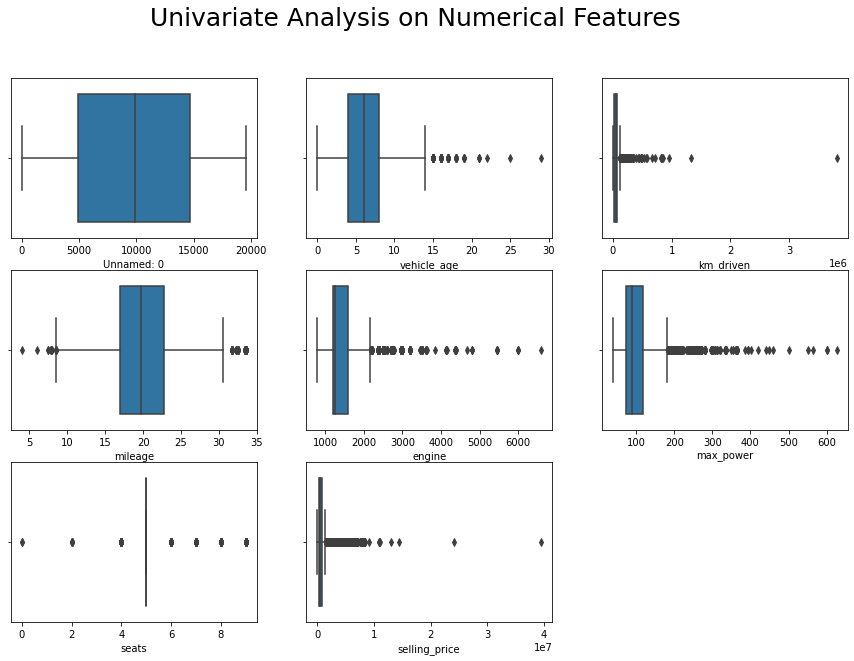

In [38]:
plt.figure(figsize=(15 , 10))
plt.suptitle("Univariate Analysis on Numerical Features", fontsize=25)
for i in range(0 , len(num_features)):
    plt.subplot(3 , 3, i+1)
    sns.boxplot(data[num_features[i]])
    plt.xlabel(num_features[i])

### Observation:

- vehicle_age , km_driven , engine , max_power and  selling price have the outliers

## Categorical Features

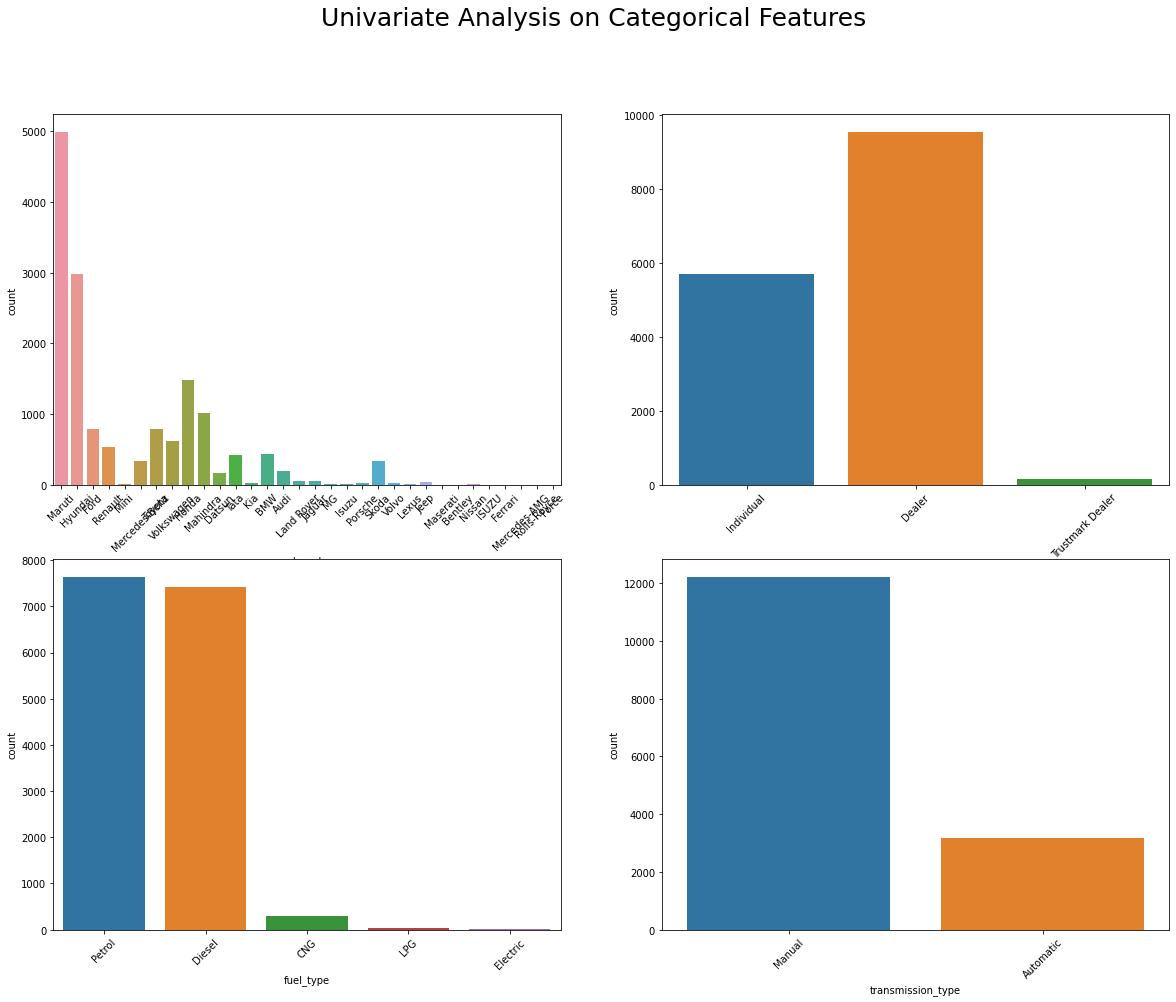

In [62]:
# categorical cols ----> countplot
plt.figure(figsize=(20, 15))
plt.suptitle("Univariate Analysis on Categorical Features", fontsize=25)
catfet = ['brand', 'seller_type', 'fuel_type', 'transmission_type']
for i in range(0, len(catfet)):
    plt.subplot(2, 2,i+1)
    sns.countplot(data[catfet[i]])
    plt.xticks(rotation=45)

### Observation :

- Maruti brand have the maximum no. of cars available
- seller type dealer has the highest
- feul type petrol and diesel have the highest no. of cars
- in transmission type manual have the highest

### Correaltion

In [65]:
data[list(data.columns)[2:]].corr()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
vehicle_age,1.000000,0.333891,-0.257394,0.098965,0.005208,0.030791,-0.241851
km_driven,0.333891,1.000000,-0.105239,0.192885,0.044421,0.192830,-0.080030
mileage,-0.257394,-0.105239,1.000000,-0.632987,-0.533128,-0.440280,-0.305549
engine,0.098965,0.192885,-0.632987,1.000000,0.807368,0.551236,0.585844
max_power,0.005208,0.044421,-0.533128,0.807368,1.000000,0.172257,0.750236
seats,0.030791,0.192830,-0.440280,0.551236,0.172257,1.000000,0.115033
selling_price,-0.241851,-0.080030,-0.305549,0.585844,0.750236,0.115033,1.000000


<AxesSubplot:>

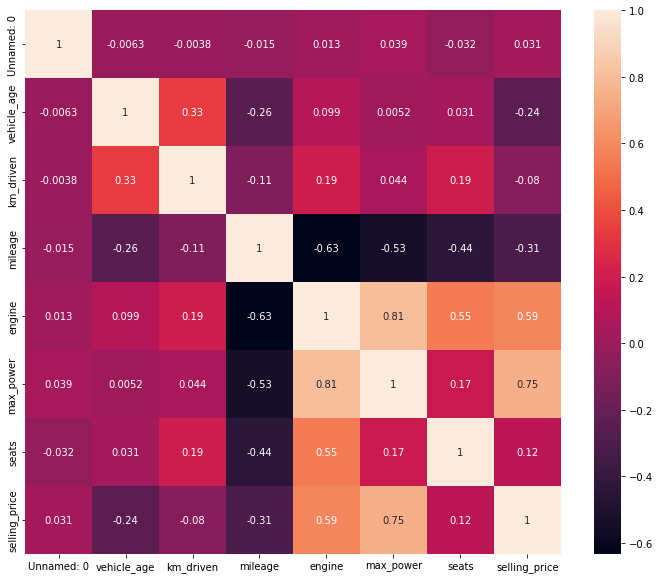

In [70]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True)

### observation :

- max_power has the highly correlated with the target feature Selling Price
- engine and mileage have the negatively correlated
- km_driven have the least correalted with the target feature

## Visulizating the Target features

(0.0, 3000000.0)

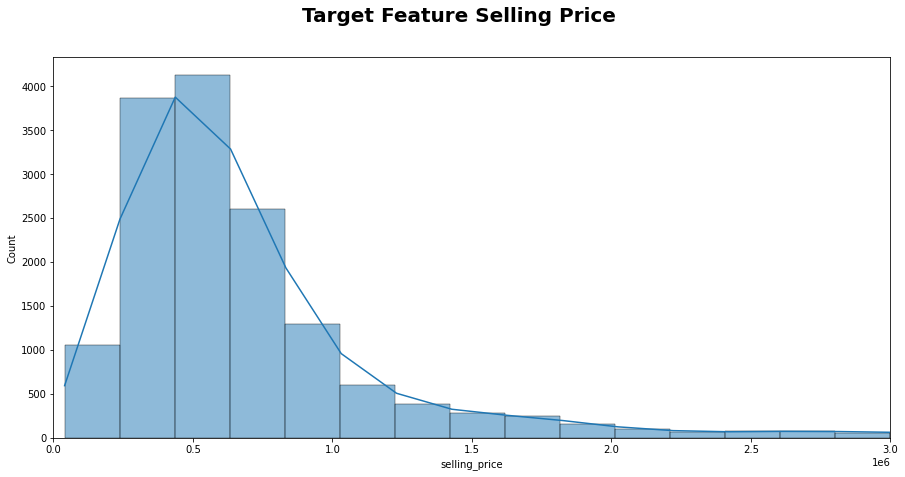

In [87]:
plt.figure(figsize=(15 , 7))
plt.suptitle("Target Feature Selling Price" , fontsize=20, weight="bold")
sns.histplot(data["selling_price"], bins=200 , kde=True)
plt.xlim(0,3000000)

### Observation:

- target feature is skewed

In [71]:
# Checking null values
data.isnull().sum()

Unnamed: 0           0
car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

- there are no missing values in our data

## Most Sold cars in Website

In [91]:
data["car_name"].value_counts()[:10]

Hyundai i20           906
Maruti Swift Dzire    890
Maruti Swift          781
Maruti Alto           778
Honda City            757
Maruti Wagon R        717
Hyundai Grand         580
Toyota Innova         545
Hyundai Verna         492
Hyundai i10           410
Name: car_name, dtype: int64

(-1.0, 10.5)

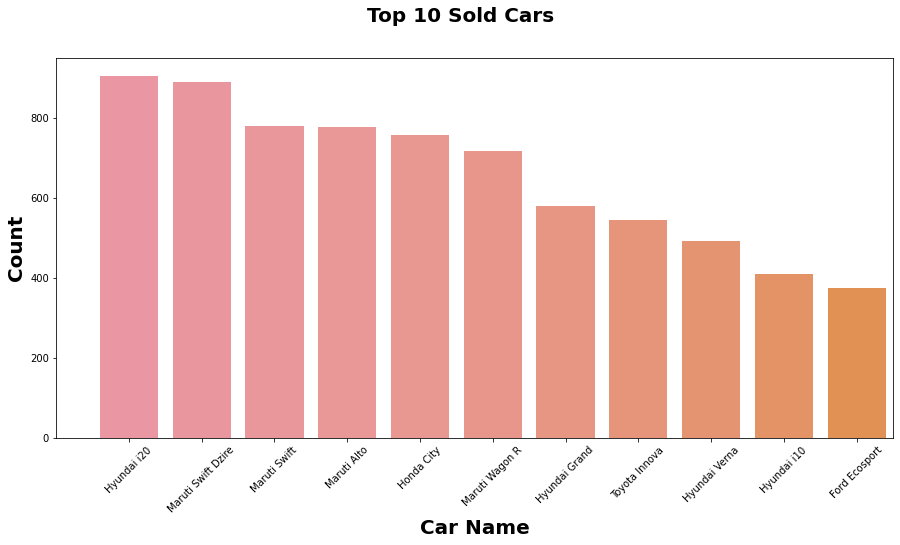

In [109]:
plt.figure(figsize=(15 , 7))
plt.suptitle("Top 10 Sold Cars" , fontsize=20 , weight="bold")
sns.countplot(x = "car_name", data=data , order= data["car_name"].value_counts().index)
plt.xticks(rotation =45)
plt.xlabel("Car Name" ,fontsize=20, weight="bold")
plt.ylabel("Count" ,fontsize=20, weight="bold")
plt.xlim(-1 , 10.5)

In [112]:
hyundai_i20 = data[data["car_name"]== "Hyundai i20"]["selling_price"].mean()

In [113]:
print("The Avearge price of Hyundai i20 Price {}".format(hyundai_i20))

The Avearge price of Hyundai i20 Price 543603.7527593819


### Observation :

- Hyundai i20 is the most sold cars 
- Hyundai i20 average selling price is  54 lakh Rs

## Most Selling Brand

In [115]:
data["brand"].value_counts()[:10]

Maruti        4992
Hyundai       2982
Honda         1485
Mahindra      1011
Toyota         793
Ford           790
Volkswagen     620
Renault        536
BMW            439
Tata           430
Name: brand, dtype: int64

(-1.0, 10.5)

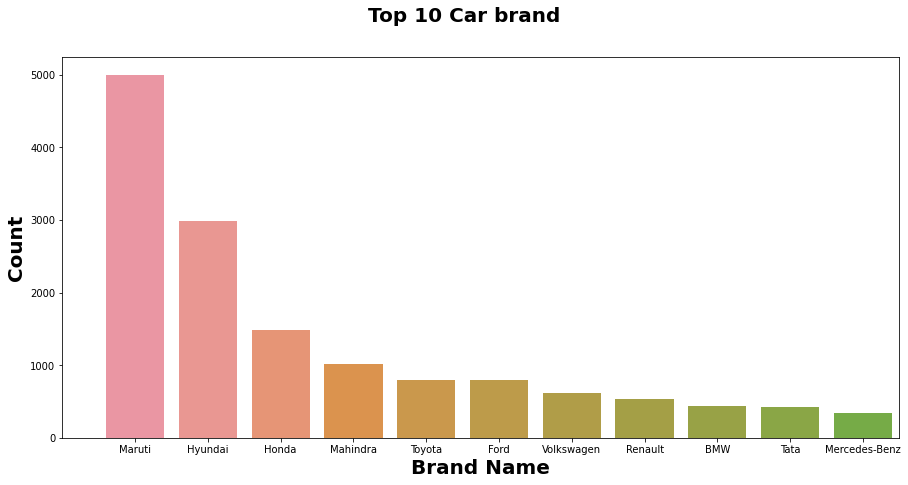

In [118]:
plt.figure(figsize=(15 , 7))
plt.suptitle("Top 10 Car brand " , fontsize=20 , weight="bold")
sns.countplot(x = "brand" , data=data , order = data["brand"].value_counts().index)
plt.xlabel("Brand Name" ,fontsize=20, weight="bold")
plt.ylabel("Count" ,fontsize=20, weight="bold")
plt.xlim(-1 , 10.5)

In [123]:
maruti_b = data[data["brand"]=="Maruti"]["selling_price"].mean()
print("Tha average price of maruti is {}".format(maruti_b))

Tha average price of maruti is 487089.3179086539


### Observation :

- Maruti has the most selling car brand and 2nd is Hyundai and 3rd is Honda
- The average selling price of hyundai is 4.8 Lakhs

## Costliest Brand and Costliest Cars

In [170]:
brand = data.groupby("brand").selling_price.max()

In [171]:
brand_df = brand.to_frame().sort_values("selling_price",ascending=False)[:10]

In [172]:
brand_df

,selling_price
brand,
Ferrari,39500000
Rolls-Royce,24200000
Bentley,14500000
Mercedes-Benz,13000000
Porsche,11100000
Land Rover,9200000
BMW,8500000
Volvo,8195000
Lexus,8000000


(-1.0, 30.5)

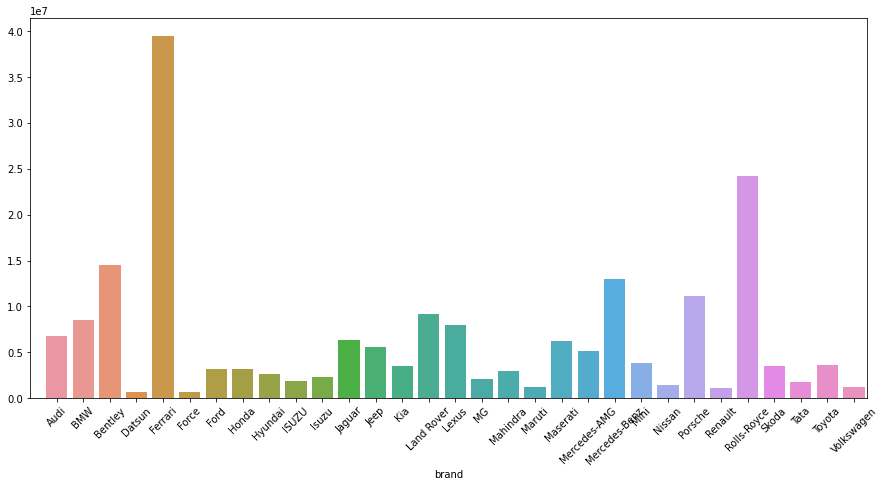

In [173]:
plt.figure(figsize=(15 , 7))
sns.barplot(x = brand.index, y= brand.values)
plt.xticks(rotation=45)
plt.xlim(-1 , 30.5)

### observation:

- ferrari is the most expensive car 
- second most expensive car is Rolls-royce
- brand name have the impact on the selling price

In [193]:
car_name = data.groupby("car_name").selling_price.max()

In [204]:
car = car_name.to_frame().sort_values("selling_price", ascending=False)[0:10]

In [205]:
car

,selling_price
car_name,
Ferrari GTC4Lusso,39500000
Rolls-Royce Ghost,24200000
Bentley Continental,14500000
Mercedes-Benz S-Class,13000000
Porsche Cayenne,11100000
Land Rover Rover,9200000
BMW 7,8500000
BMW Z4,8250000
Volvo XC,8195000


(-1.0, 10.5)

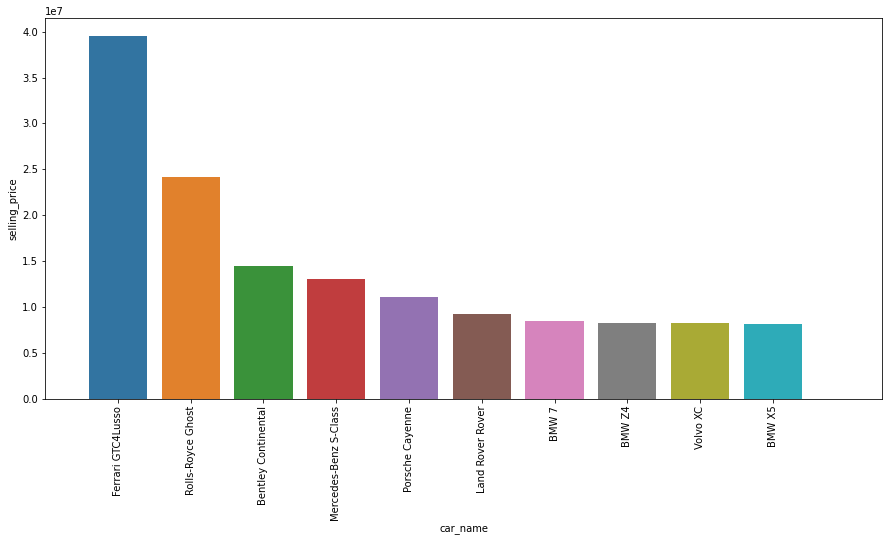

In [206]:
plt.figure(figsize=(15 , 7))
sns.barplot(x=car.index , y=car.selling_price)
plt.xticks(rotation=90)
plt.xlim(-1 , 10.5)

### Observation :

- Ferrari GTC4Lusso and Rolls-Royce Ghost have the most Expensive car

## Most Mileage brand and Car name

In [213]:
mileage = data.groupby("brand")["mileage"].mean().sort_values(ascending=False).head(15)
mileage

brand
Maruti        22.430980
Renault       22.099142
Datsun        21.215647
Lexus         20.846000
Ford          19.922620
Honda         19.908795
Maserati      19.820000
Tata          19.755279
Hyundai       19.588776
Volkswagen    18.689774
Mini          18.287647
Skoda         17.667006
BMW           17.440182
Kia           17.323125
Force         17.000000
Name: mileage, dtype: float64

(-1.0, 14.5)

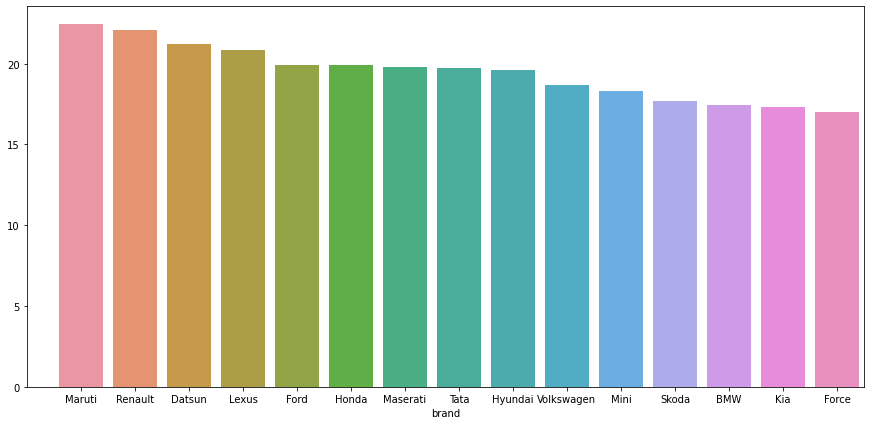

In [217]:
plt.figure(figsize=(15 , 7))
sns.barplot(x= mileage.index , y = mileage.values)
plt.xlim(-1 , 14.5)

### Observation:

- Maruti has the highest mileage 
- force has the least mileage

## Car with Highest Mileage

In [226]:
car_mil = data.groupby("car_name")["mileage"].mean().sort_values(ascending=False)[:10]

In [227]:
car_mil

car_name
Tata Tiago          24.625103
Maruti Ciaz         24.289046
Maruti Vitara       24.231932
Renault KWID        24.037810
Maruti Celerio      23.703502
Maruti Dzire VXI    23.512941
Maruti Dzire LXI    23.260000
Maruti Dzire ZXI    23.260000
Ford Aspire         22.993846
Maruti Swift        22.719910
Name: mileage, dtype: float64

<AxesSubplot:xlabel='car_name'>

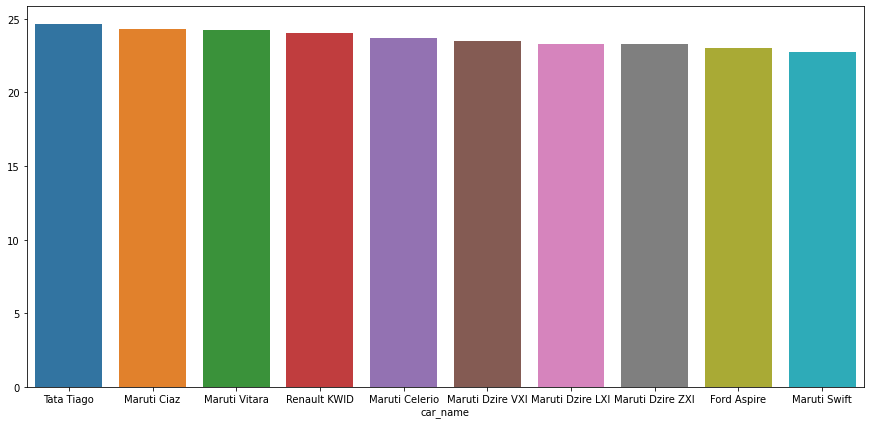

In [228]:
plt.figure(figsize=(15 , 7))
sns.barplot(x = car_mil.index , y = car_mil.values)

## Kilometer driven vs Selling Price

(-10000.0, 10000000.0)

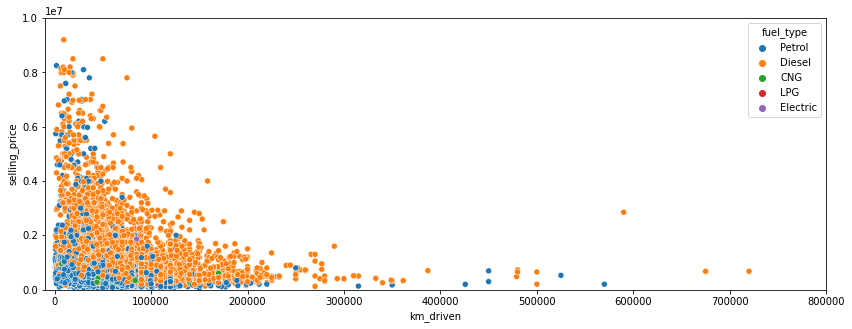

In [240]:
plt.figure(figsize=(14 , 5))
sns.scatterplot(x = "km_driven" , y="selling_price" , data=data, color="b", hue="fuel_type")
plt.xlim(-10000 , 800000)
plt.ylim(-10000, 10000000)

### Observation:

- most of the car selling between 0 to 20k kilometer
- low km driven car are most selling price as compare to high km driven

In [247]:
fuel = data.groupby("fuel_type")["selling_price"].median().sort_values(ascending=False)

In [248]:
fuel

fuel_type
Electric    1857500.0
Diesel       700000.0
Petrol       460000.0
CNG          370000.0
LPG          182500.0
Name: selling_price, dtype: float64

<AxesSubplot:xlabel='fuel_type', ylabel='selling_price'>

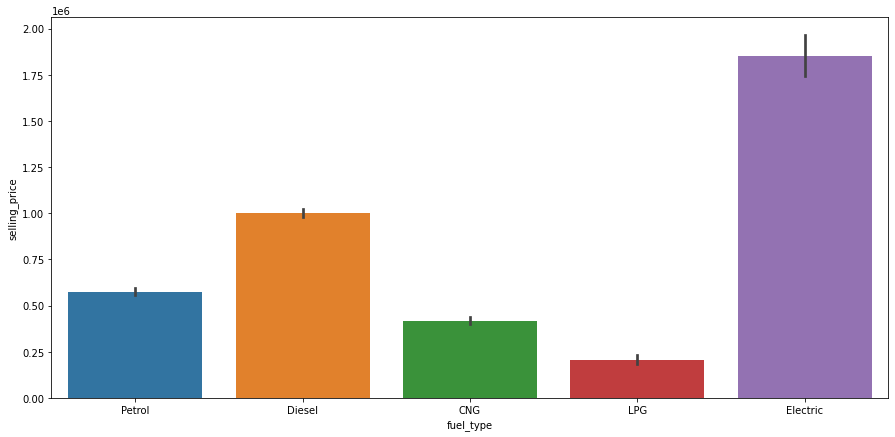

In [249]:
plt.figure(figsize=(15 , 7))
sns.barplot(x = data["fuel_type"] , y = data["selling_price"])

### observation :

- Electric cars have the highest selling price
- followed diesel and petrol
- fuel type has the impact on target feature 

## Most sold fuel type

In [250]:
data["fuel_type"].value_counts()

Petrol      7643
Diesel      7419
CNG          301
LPG           44
Electric       4
Name: fuel_type, dtype: int64

<AxesSubplot:xlabel='fuel_type', ylabel='count'>

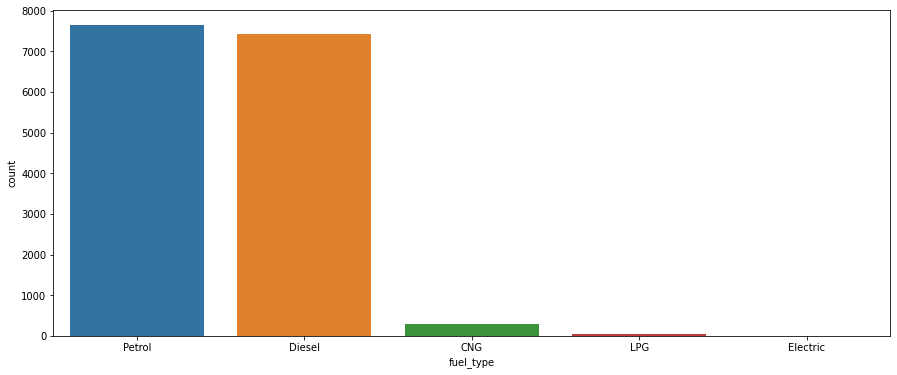

In [252]:
plt.figure(figsize=(15, 6))
sns.countplot(x = data["fuel_type"])

### observation :

- Petrol and diesel used the car market
- most sold fuel type is petrol and diseal
- least sold fuel type is electric

## Fuel type and mileage given

In [253]:
mil_given = data.groupby("fuel_type")["mileage"].mean().sort_values(ascending=False)

In [254]:
mil_given

fuel_type
CNG         25.814651
Diesel      20.060030
Electric    19.160000
Petrol      19.123045
LPG         17.836364
Name: mileage, dtype: float64

<AxesSubplot:xlabel='fuel_type', ylabel='mileage'>

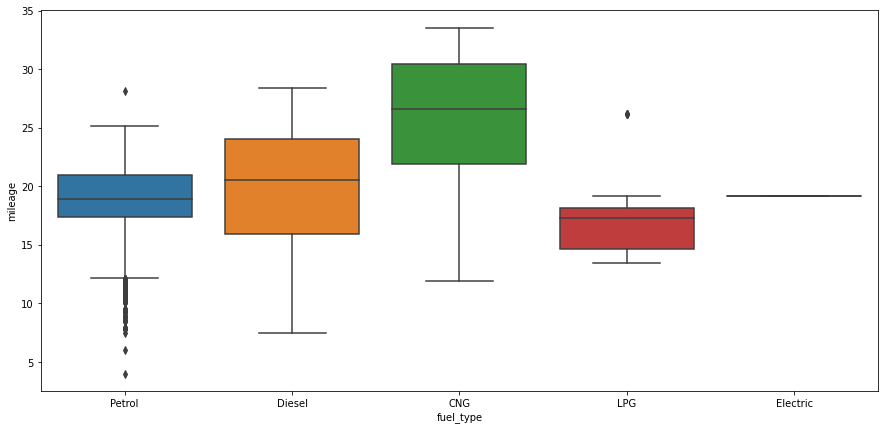

In [255]:
plt.figure(figsize=(15 , 7))
sns.boxplot(x = "fuel_type", y="mileage", data=data)

### observation :

- fuel type CNG gives the best mileage
- least fuel type is LPG

## mileage vs selling price

(-10000.0, 10000000.0)

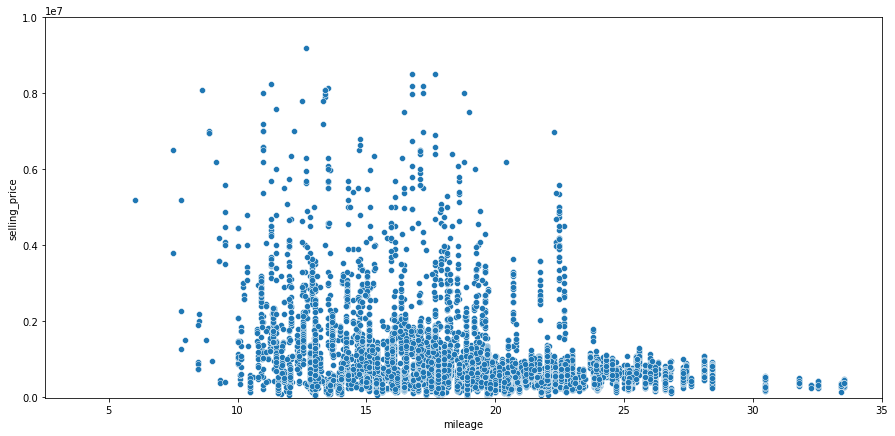

In [265]:
plt.figure(figsize=(15 , 7))
sns.scatterplot(x = "mileage" , y = "selling_price", data=data)
plt.ylim(-10000, 10000000)

### Observation :

- mileage between 10 to 23 is the highest selling price

## vehicle age vs selling price

(0.0, 2500000.0)

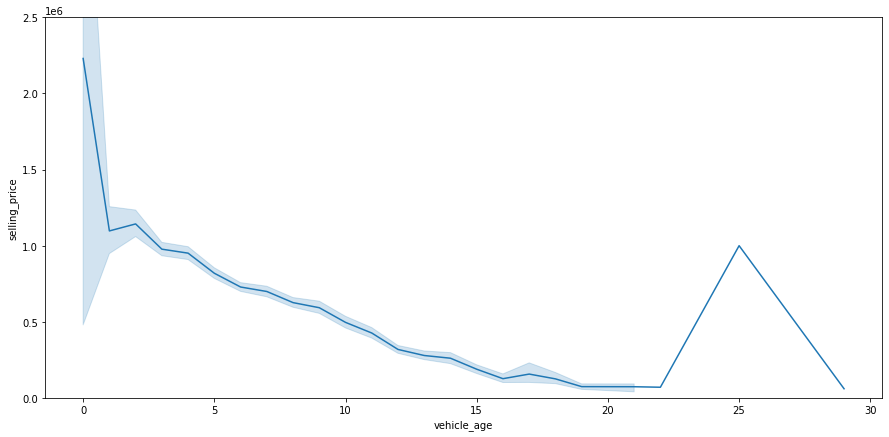

In [270]:
plt.figure(figsize=(15 , 7))
sns.lineplot(data= data , x = "vehicle_age", y = "selling_price")
plt.ylim(0 , 2500000)

### observation :

- as the vehicle age increase the price gets reduced

In [271]:
vich_age = data.groupby("vehicle_age")["mileage"].mean().sort_values(ascending = False)

In [272]:
vich_age = vich_age.to_frame()

In [273]:
vich_age

,mileage
vehicle_age,
29,22.050000
0,21.140000
3,20.858640
5,20.633798
4,20.524369
6,20.242282
2,19.900253
7,19.806780
1,19.765339


<AxesSubplot:xlabel='vehicle_age', ylabel='mileage'>

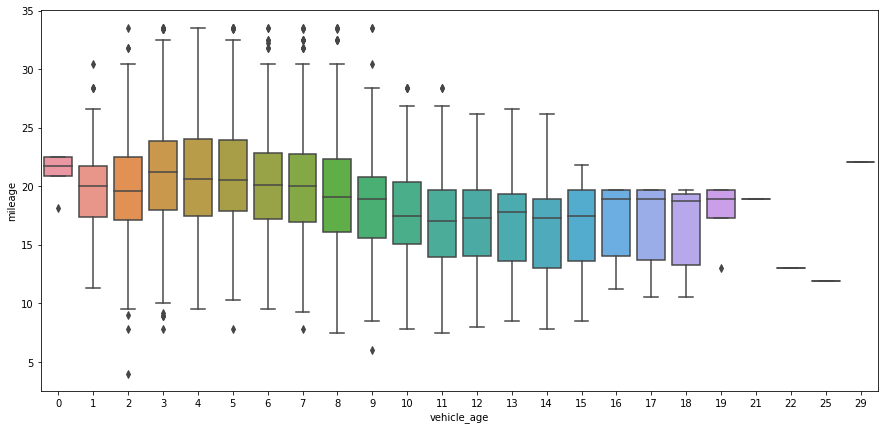

In [274]:
plt.figure(figsize=(15 , 7))
sns.boxplot(x = data["vehicle_age"], y=data["mileage"])

### observation :

- as the vehicle age increase the mileage get decreases
- new vehicle has the good milage has compare to old 

In [285]:
old_veh = data.groupby("car_name")["vehicle_age"].max().sort_values(ascending = False)

In [286]:
old_veh = old_veh.to_frame()

In [287]:
old_veh

,vehicle_age
car_name,
Maruti Alto,29
BMW 3,25
Honda City,22
Maruti Wagon R,21
Mahindra Bolero,18
...,...
Hyundai Venue,2
Renault Triber,2
Kia Carnival,1


### observation 

- Maruti Alto is the old car available 29 years on the website and BMW3 is 25 years old

### Transmission Type

In [288]:
data["transmission_type"].value_counts()

Manual       12225
Automatic     3186
Name: transmission_type, dtype: int64

- manual transmission has the highest car sold

<AxesSubplot:xlabel='transmission_type', ylabel='selling_price'>

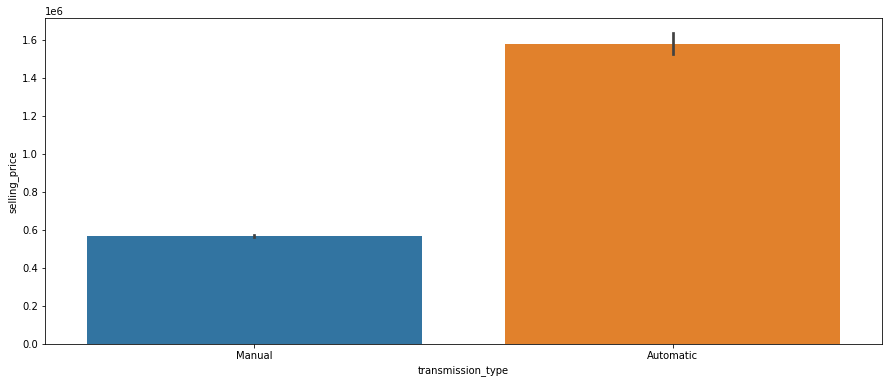

In [292]:
plt.figure(figsize=(15 , 6))
sns.barplot(x = "transmission_type" , y="selling_price", data=data)

### observation

- automatic cars have the highest selling price as compare to manual

### Seller type

In [294]:
data["seller_type"].value_counts()

Dealer              9539
Individual          5699
Trustmark Dealer     173
Name: seller_type, dtype: int64

<AxesSubplot:xlabel='seller_type', ylabel='count'>

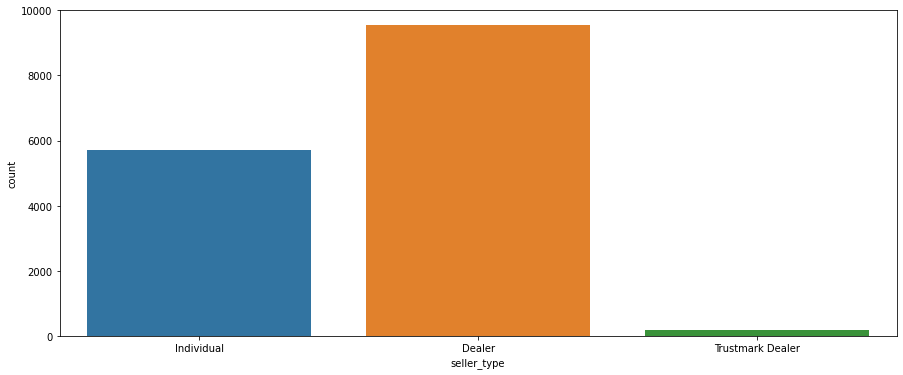

In [295]:
plt.figure(figsize=(15 , 6))
sns.countplot(x= data["seller_type"],data=data )

- Dealers have put more ads on used car website.
- Dealers have put 9539 ads with median selling price of 5.91 Lakhs.
- Followed by Individual with 5699 ads with median selling price of 5.4 Lakhs.
- Dealers have more median selling price than Individual.

### Final Reprot

- The datatypes and Column names were right and there was 15411 rows and 13 columns
- The selling_price column is the target to predict. i.e Regression Problem.
- There are outliers in the km_driven, enginer, selling_price, and max power.
- Dealers are the highest sellers of the used cars.
- Skewness is found in few of the columns will check it after handling outliers.
- Vehicle age has negative impact on the price.
- Manual cars are mostly sold and automatic has higher selling average than manual cars.
- Petrol is the most preffered choice of fuel in used car website, followed by diesel and LPG.
- We just need less data cleaning for this dataset.
- We can see from EDA that Brand and Model has same information as Carname. Hence we can drop brand and model columns and retain carname.